## Scoring customer propensity to purchase
Training a model based on a shoppers actions on a website to identify the best prospects who did not purchase yesterday.

**Notes** : This data is sampled and all UserIDs are dummies.

<br><br>
### Introduction
We have many visitors to our website every day, some purchase but many do not. We spend money re-targeting past visitors, we'd like to optomise this activity by targeting the visitors who are more likely to convert. To do this, we've taken data showing which parts of our website users interacted with, our questions are:-
<br><br>
1.Which of these interactiuons effect a users likelyhood to purchase?<br>
2.Can we score visitors from yesterday who did not purchase, to see who the most valauve prospects are?


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [3]:
train = pd.read_csv('Customer_propensity_to_purchase/training_sample.csv')

In [4]:
train.head(5)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [5]:
train.dtypes

UserID                     object
basket_icon_click           int64
basket_add_list             int64
basket_add_detail           int64
sort_by                     int64
image_picker                int64
account_page_click          int64
promo_banner_click          int64
detail_wishlist_add         int64
list_size_dropdown          int64
closed_minibasket_click     int64
checked_delivery_detail     int64
checked_returns_detail      int64
sign_in                     int64
saw_checkout                int64
saw_sizecharts              int64
saw_delivery                int64
saw_account_upgrade         int64
saw_homepage                int64
device_mobile               int64
device_computer             int64
device_tablet               int64
returning_user              int64
loc_uk                      int64
ordered                     int64
dtype: object

In [6]:
train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

Here we can see a clear snspshot of the data, we have 1's or 0's in the columns, indicating wheather or not a user interacted with these areas of the website. The last colum shows whether the user ordered or not, this will be important!

## Is there any correlation
In order to answer our first question, we can start by exploring any correlation between there individual website actions and an order, since we have all thes fields in our data.

We've got quite a few fields, so let's start with a heatmap to view correlations...

In [8]:
corr = train.corr()
corr

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
basket_icon_click,1.000000,0.466671,0.529947,0.073016,0.082893,0.057253,0.109342,0.044153,0.291608,0.323940,...,0.008741,0.052922,0.030764,0.203087,0.016203,-0.001757,-0.006019,0.126640,0.018518,0.428334
basket_add_list,0.466671,1.000000,0.340968,0.106852,0.061462,0.028994,0.096608,0.019061,0.469625,0.208082,...,0.004161,0.030286,0.018150,0.180221,-0.017202,0.016629,0.015516,0.057443,0.018797,0.287666
basket_add_detail,0.529947,0.340968,1.000000,0.085854,0.124230,0.037502,0.109043,0.050724,0.247205,0.222444,...,0.008101,0.048410,0.024255,0.175138,-0.018800,0.032794,-0.001799,0.057680,0.030956,0.414420
sort_by,0.073016,0.106852,0.085854,1.000000,0.185661,-0.009754,0.058155,0.024056,0.124273,0.028453,...,0.006196,0.028102,0.012194,0.128205,-0.278043,0.269589,0.078088,0.010366,-0.051148,0.054636
image_picker,0.082893,0.061462,0.124230,0.185661,1.000000,-0.007182,0.046968,0.039412,0.074726,0.024515,...,0.005710,0.031267,0.008912,0.074698,-0.235542,0.241681,0.050471,0.002085,-0.041662,0.071492
account_page_click,0.057253,0.028994,0.037502,-0.009754,-0.007182,1.000000,0.014474,0.013251,0.016912,0.033595,...,0.008158,0.048095,0.026949,0.073538,0.038549,-0.025294,-0.017028,0.016550,-0.001389,0.057279
promo_banner_click,0.109342,0.096608,0.109043,0.058155,0.046968,0.014474,1.000000,0.031775,0.097991,0.056917,...,0.000998,0.024616,0.017825,0.073477,-0.032351,0.035099,0.007879,0.019168,-0.018817,0.056533
detail_wishlist_add,0.044153,0.019061,0.050724,0.024056,0.039412,0.013251,0.031775,1.000000,0.038497,0.030591,...,0.000713,0.013570,0.008133,0.033563,-0.009750,0.014493,0.002081,0.013149,-0.010889,0.023516
list_size_dropdown,0.291608,0.469625,0.247205,0.124273,0.074726,0.016912,0.097991,0.038497,1.000000,0.140700,...,0.001118,0.028138,0.015929,0.235547,-0.008991,-0.012537,0.036213,0.100140,-0.002313,0.154867
closed_minibasket_click,0.323940,0.208082,0.222444,0.028453,0.024515,0.033595,0.056917,0.030591,0.140700,1.000000,...,0.005080,0.021881,0.012418,0.077102,-0.000571,-0.028121,0.040407,0.052852,0.015351,0.140011


In [9]:
train.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
Name: ordered, dtype: float64

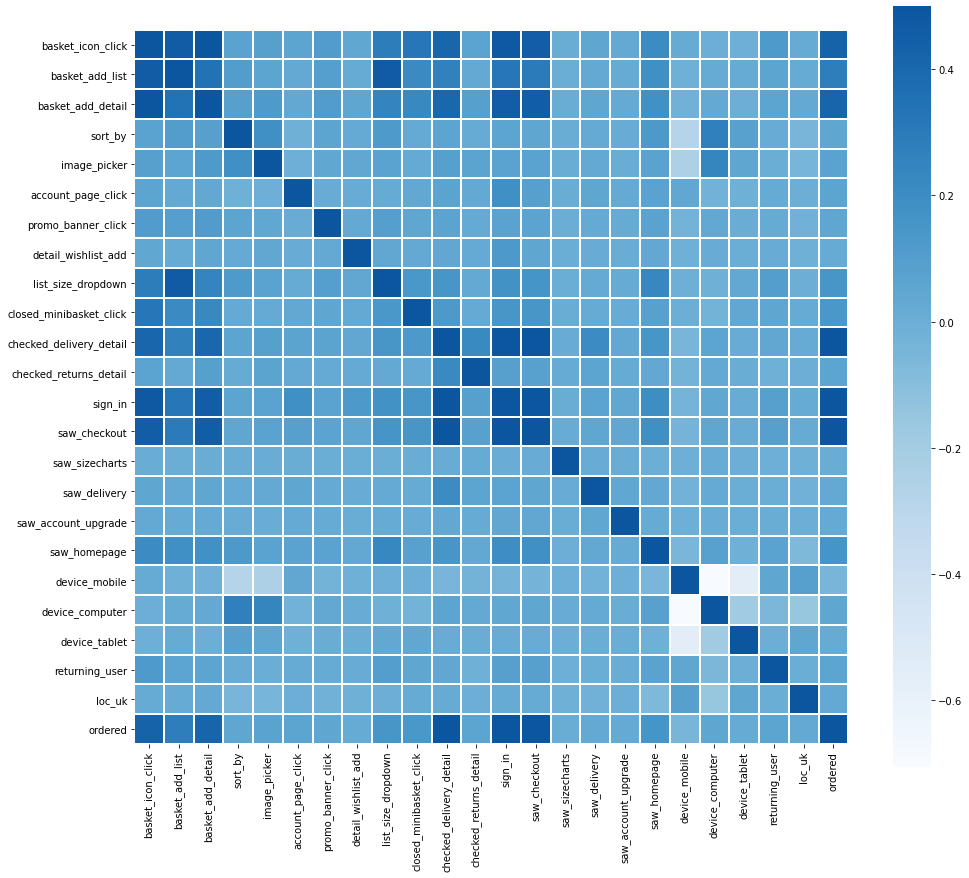

In [10]:
corr = train.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0, square=True, linewidths=2, cmap='Blues')
plt.show()

Interesting - there seems to be a strong correlation between visitors who ordered and visitors who saw the checkout, this makes sense! There are also strong correlations for people who cheked out delivery times and added items to their shopping cart - let's get a closer look at the correlations for orders...

Alright! Looks like our initial insights from the heatmap were correct, users who checked out the delivery options on a product detail page have an almost 80% correlation to orders, there's definately something in here we can use! But wait...it looks like there isn't much correlation between users on a mobile and orders, so we should proabley remove this field from our predictor.

## Let's get predicting!
First we build our predictor and targets variables, we're going to drop 'ordered' form our predictors, as it is our target variable. We'll also remove 'UserID', as it has no impact on likelyhood to order and 'device_mobile' as we've seen it has a negative correlation to orders.

In [11]:
# Droping columns with low correlation
predictors = train.drop(['ordered','UserID','device_mobile'], axis=1)
targets = train.ordered

In [12]:
predictors.columns

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_computer', 'device_tablet', 'returning_user',
       'loc_uk'],
      dtype='object')

Let's take a look at our predictor columns to check we've included everything we wanted, and not left in something we shouldn't have...

In [13]:
predictors.corr()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk
basket_icon_click,1.000000,0.466671,0.529947,0.073016,0.082893,0.057253,0.109342,0.044153,0.291608,0.323940,...,0.478834,0.458774,0.008741,0.052922,0.030764,0.203087,-0.001757,-0.006019,0.126640,0.018518
basket_add_list,0.466671,1.000000,0.340968,0.106852,0.061462,0.028994,0.096608,0.019061,0.469625,0.208082,...,0.312276,0.297681,0.004161,0.030286,0.018150,0.180221,0.016629,0.015516,0.057443,0.018797
basket_add_detail,0.529947,0.340968,1.000000,0.085854,0.124230,0.037502,0.109043,0.050724,0.247205,0.222444,...,0.461659,0.456713,0.008101,0.048410,0.024255,0.175138,0.032794,-0.001799,0.057680,0.030956
sort_by,0.073016,0.106852,0.085854,1.000000,0.185661,-0.009754,0.058155,0.024056,0.124273,0.028453,...,0.058662,0.055959,0.006196,0.028102,0.012194,0.128205,0.269589,0.078088,0.010366,-0.051148
image_picker,0.082893,0.061462,0.124230,0.185661,1.000000,-0.007182,0.046968,0.039412,0.074726,0.024515,...,0.074353,0.071116,0.005710,0.031267,0.008912,0.074698,0.241681,0.050471,0.002085,-0.041662
account_page_click,0.057253,0.028994,0.037502,-0.009754,-0.007182,1.000000,0.014474,0.013251,0.016912,0.033595,...,0.187988,0.081079,0.008158,0.048095,0.026949,0.073538,-0.025294,-0.017028,0.016550,-0.001389
promo_banner_click,0.109342,0.096608,0.109043,0.058155,0.046968,0.014474,1.000000,0.031775,0.097991,0.056917,...,0.073081,0.067201,0.000998,0.024616,0.017825,0.073477,0.035099,0.007879,0.019168,-0.018817
detail_wishlist_add,0.044153,0.019061,0.050724,0.024056,0.039412,0.013251,0.031775,1.000000,0.038497,0.030591,...,0.130368,0.052786,0.000713,0.013570,0.008133,0.033563,0.014493,0.002081,0.013149,-0.010889
list_size_dropdown,0.291608,0.469625,0.247205,0.124273,0.074726,0.016912,0.097991,0.038497,1.000000,0.140700,...,0.170406,0.159885,0.001118,0.028138,0.015929,0.235547,-0.012537,0.036213,0.100140,-0.002313
closed_minibasket_click,0.323940,0.208082,0.222444,0.028453,0.024515,0.033595,0.056917,0.030591,0.140700,1.000000,...,0.153448,0.148010,0.005080,0.021881,0.012418,0.077102,-0.028121,0.040407,0.052852,0.015351


In [14]:
X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.3)

In [15]:
print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

Predictor - Training :  (318780, 22) Predictor - Testing :  (136621, 22)


For our model we are going to use a naise bayes classififer, below we instantiate it, fit it, then predict using it, then we an analyse the accuracy of our predictions...



In [16]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)

#Analyze accuracy of predictions
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[129379,   1475],
       [    75,   5692]], dtype=int64)

In [17]:
# And apply an accuracy score to our model...
sklearn.metrics.accuracy_score(y_test, predictions)

0.9886547456101185

In [18]:
yesterday_prospects = pd.read_csv('Customer_propensity_to_purchase/training_sample.csv')

In [19]:
yesterday_prospects.head(5)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [20]:
#Now let's explore this DataFrame and check everything is as expected...
yesterday_prospects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

We're going to drop UserID before we predict on this data, so that is matches our training set, but before we do let's pop it into another variable, so we can pull back this identifier later. Once that's done we can drop our unwanted fields and print the head() to check our data...looking good?

In [21]:
userids = yesterday_prospects.UserID
yesterday_prospects = yesterday_prospects.drop(['ordered','UserID','device_mobile'], axis=1)

In [22]:
yesterday_prospects.head(5)

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1,0,1,0,0,0,0,1,0,...,1,1,0,0,0,1,0,1,0,1


In [23]:
yesterday_prospects.shape

(455401, 22)

Now we'll run our predictions and insert them into a field called 'propensity', print the head, and check it's all come togeather...

In [24]:
yesterday_prospects['propensity'] = classifier.predict_proba(yesterday_prospects)[:,1]

In [25]:
yesterday_prospects.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,propensity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
4,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,1.0


In [26]:
pd.DataFrame(userids)
results = pd.concat([userids, yesterday_prospects], axis=1)

In [27]:
results.head(10)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,propensity
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1,1.0
5,b159-6b73a0d6-b159-4728-81a6-914765,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
6,7775-6b73b976-7775-4324-b1d9-622031,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0.0
7,4135-6b73ba04-4135-4298-8a12-493138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
8,a01e-6b73d2dc-a01e-4647-ac4b-940063,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
9,3816-6b73db7d-3816-4b4b-8b85-315756,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
